In [21]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [22]:
w = 1936
h = 1176
header_size = 512

In [23]:
def equalize_histogram(img, max):
    [M, N]=img.shape
    # Calcul de la transformation
    T=1/(M*N)*np.cumsum(np.histogram(img, bins=max+1, range=(0, max))[0])
    img_eq=255*T[img]
    return img_eq

In [ ]:
file_path = r'D:\StageE23\Data\Ete_2022\Participant06\autocorrection\Prise01\auto_01_007425_XYZ_39.raw'

with open(file_path, 'r') as f:
        f.seek(header_size)
        xyz = np.fromfile(f, np.float32).reshape((h,w,3))

z = xyz[:,:,2].T
z = z[-1:0:-1, :][800:1280, 450:800]

z_int = z.astype(np.uint32)
z_int[np.where(z < 1800)] = 0
z_eq = equalize_histogram(z_int)

print(np.max(z), np.median(z), np.max(z_eq), np.median(z_eq))

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(z)
ax2.imshow(z_eq)
plt.show()

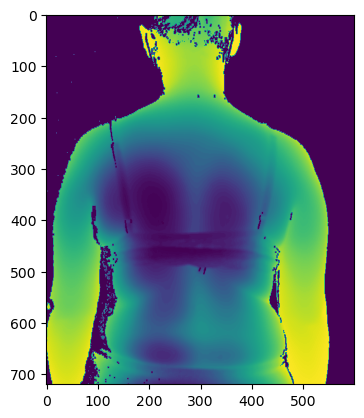

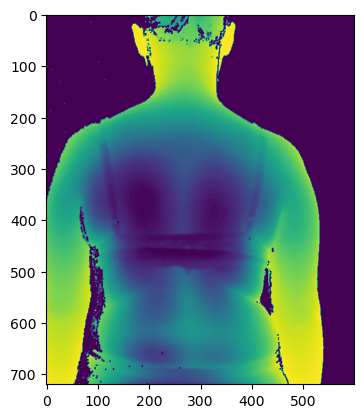

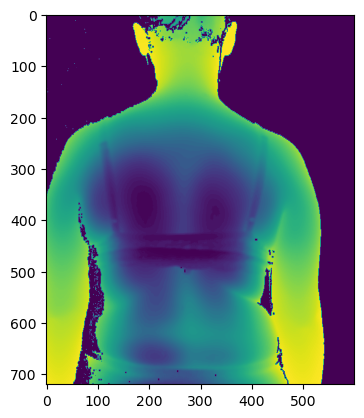

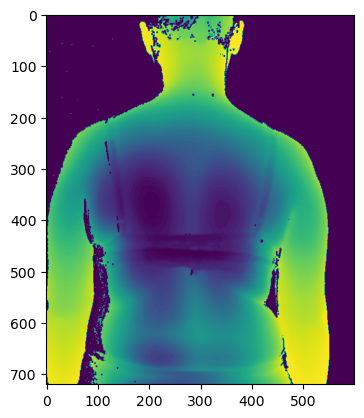

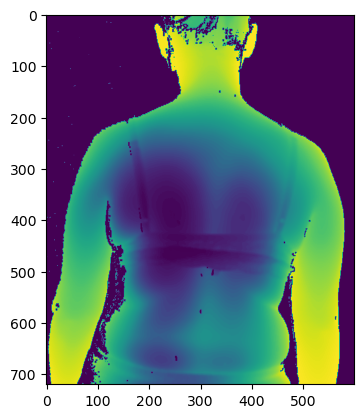

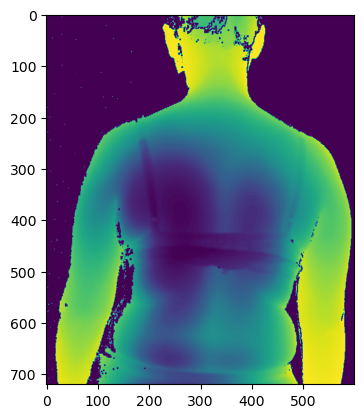

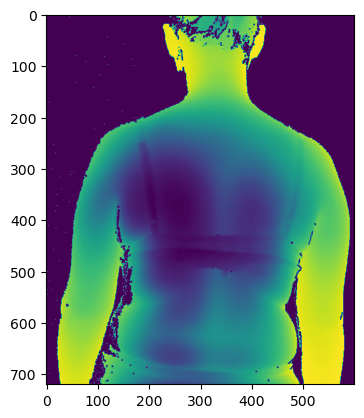

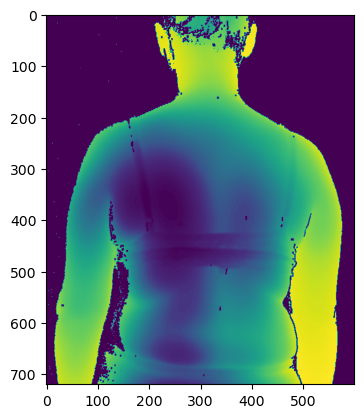

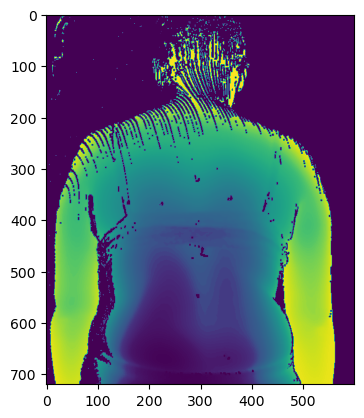

In [37]:
path = r'D:\StageE23\Data\Ete_2022\Participant03\autocorrection\Prise01\xyz'
w1 = 300
w2 = 900
h1 = 560
h2 = 1280

for i, file in enumerate(os.listdir(path)):
    with open(os.path.join(path, file), 'r') as f:
        f.seek(header_size)
        xyz = np.fromfile(f, np.float32).reshape((h,w,3))

    z = xyz[:,:,2].T
    z = z[-1:0:-1, :][h1:h2, w1:w2]

    z_int = z.astype(np.uint32)
    z_int[np.where(z < np.min(z_int)+100)] = 0
    z_eq = equalize_histogram(z_int, np.max(z_int))

    if i%10 == 0:
        fig, ax = plt.subplots()
        ax.imshow(z_eq)
plt.show()